### pyBlockSeis - Block Choice Seismic Analysis in Python
Validate against original MATLAB code

#### Acknowledgements
- Python adpation of the Matlab software Block Choice Seismic Analysis (BCseis, version 1.1) by Charles A. Langston and S. Mostafa Mousavi.
- Forward and inverse CWTs functions based on the Synchrosqueezing Toolbox V1.21 by Eugene Brevdo and Gaurav Thakur.  (https://github.com/ebrevdo/synchrosqueezing).

In [14]:
import sys
sys.path.append("src")

import pyblockseis as bcs
from obspy.core import read
import matplotlib.pyplot as plt

import timeit
import numpy as np

Block contains 1 trace(s):
        wave_type: morlet
          nvoices: 16
bandpass_blocking: True
        scale_min: 1.0
        scale_max: 200.0
  block_threshold: 1.0
   estimate_noise: True
  noise_starttime: 0.0
    noise_endtime: 60.0
  noise_threshold: hard
 signal_threshold: hard
    nsigma_method: ECDF
    snr_detection: False
   snr_lowerbound: 1.0



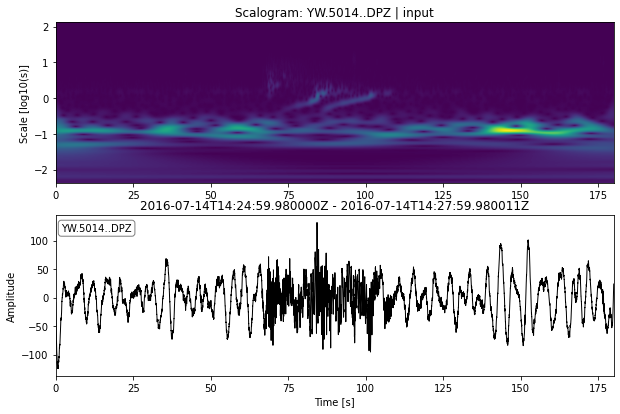

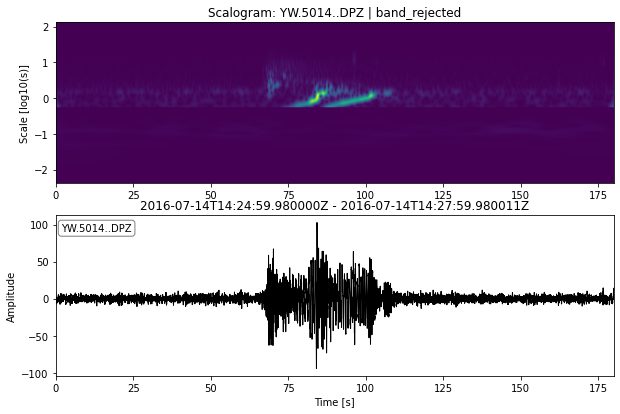

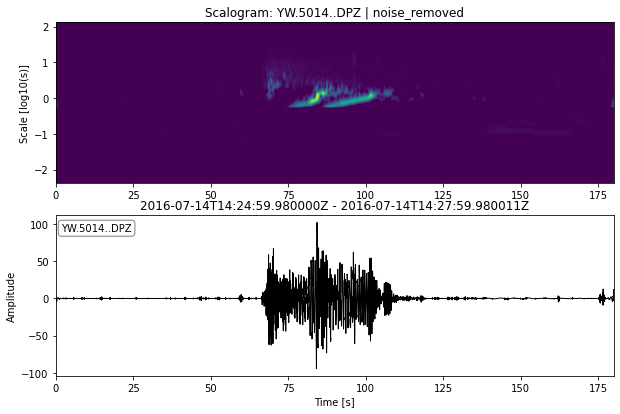

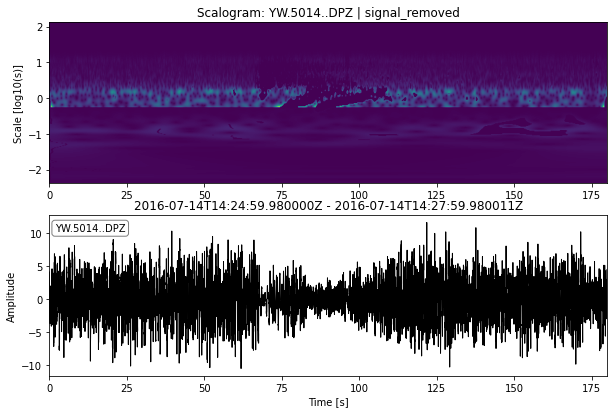

Run took -0.0039 seconds


In [15]:
# Read example data from BCseis
sacfile = "testdata/5014.YW.0.sp0011.DPZ"
#sacfile = "testdata/*DPZ" # multiple traces
st = read(sacfile)

start = timeit.timeit()
params = bcs.Parameter(block_threshold=1.0, noise_threshold="hard", signal_threshold="hard")

# Initalize the block processing module
block = bcs.Block(choice=params, data=st)
print(block)

# Run the denoiser
block.run()
end = timeit.timeit()

# Plot results
block.plot("input")
block.plot("band_rejected")
block.plot("noise_removed")
block.plot("signal_removed")
print("Run took %.4f seconds"%(end - start))

In [16]:
# Available stations
block.get_station_list()

['YW.5014.']

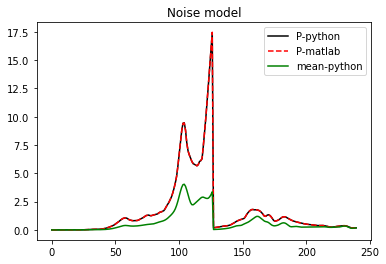

In [17]:
# Compare noise model outputs
plt.figure()
plt.title("Noise model")

# Get the noise model
waves = block.get_noise_model().select(network="YW", station="5014")

# Plot figure
plt.plot(waves[0].noise_model.P,"k",label="P-python")
matP = np.loadtxt("testdata/_matlab/P.txt")
plt.plot(matP,"r--",label="P-matlab")
plt.plot(waves[0].noise_model.M,"g",label="mean-python")
plt.legend()

#### Hard-thresholding

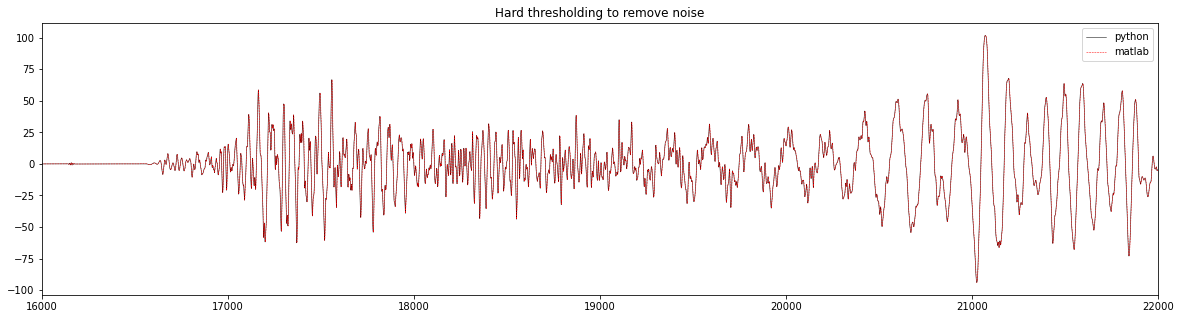

In [18]:
# Compare processed data
tag = "noise_removed"

# Select data
trace_py = block.waveforms.data[tag].select(network="YW", station="5014")[0]
trace_m = read("testdata/_matlab/icwtblock_noisehard.sac",format="SAC")[0]

# Plot figure
plt.figure(figsize=(20,5))
plt.title("Hard thresholding to remove noise")
plt.plot(trace_py.data,"k",linewidth=0.5,label="python")
plt.plot(trace_m.data,"r--",linewidth=0.5,label="matlab")
plt.xlim([16000,22000])
plt.legend()

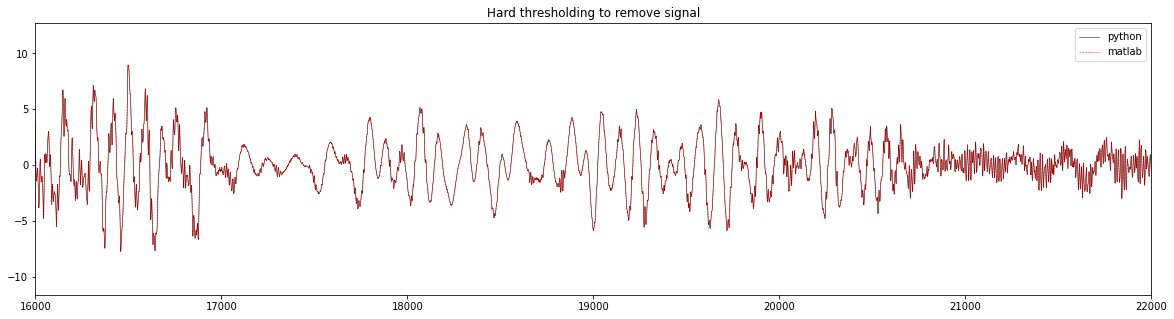

In [19]:
# Compare processed data
tag = "signal_removed"

# Select data
trace_py = block.waveforms.data[tag].select(network="YW", station="5014")[0]
trace_m = read("testdata/_matlab/icwtblock_signalhard.sac",format="SAC")[0]

# Plot figure
plt.figure(figsize=(20,5))
plt.title("Hard thresholding to remove signal")
plt.plot(trace_py.data,"k",linewidth=0.5,label="python")
plt.plot(trace_m.data,"r--",linewidth=0.5,label="matlab")
plt.xlim([16000,22000])
plt.legend()

#### Soft-thresholding

In [20]:
block.params.noise_threshold="soft"
block.params.signal_threshold="soft"
block.run()

Apply new noise thresholding.
Apply new signal thresholding.


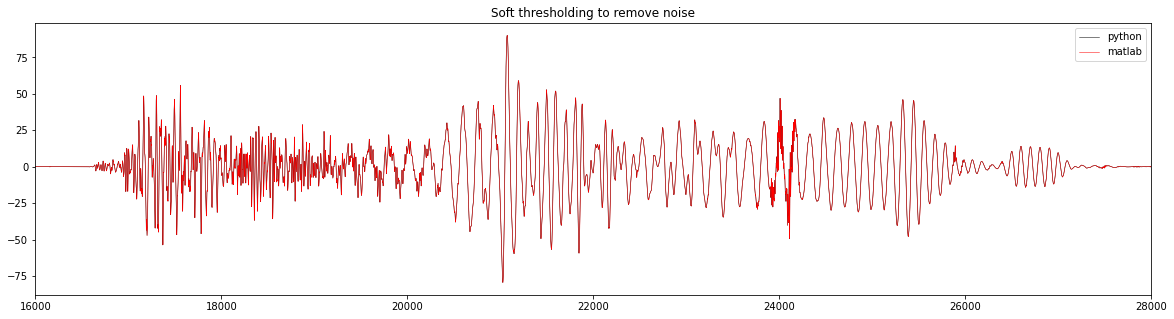

In [21]:
# Compare results
tag = "noise_removed"

# Select station
trace_py = block.waveforms.data[tag].select(network="YW", station="5014")[0]
trace_m = read("testdata/_matlab/icwtblock_noisesoft.sac",format="SAC")[0]

plt.figure(figsize=(20,5))
plt.title("Soft thresholding to remove noise")
plt.plot(trace_py.data,"k",linewidth=0.5,label="python")
plt.plot(trace_m.data,"r-",linewidth=0.5,label="matlab")
plt.xlim([16000,28000])
plt.legend()

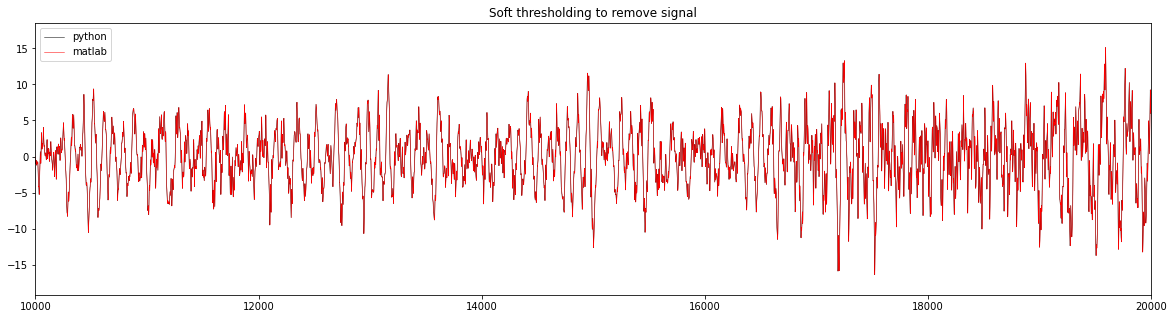

In [22]:
# Compare results
tag = "signal_removed"

# Select station
trace_py = block.waveforms.data[tag].select(network="YW", station="5014")[0]
trace_m = read("testdata/_matlab/icwtblock_signalsoft.sac",format="SAC")[0]

# Plot figure
plt.figure(figsize=(20,5))
plt.title("Soft thresholding to remove signal")
plt.plot(trace_py.data,"k",linewidth=0.5,label="python")
plt.plot(trace_m.data,"r-",linewidth=0.5,label="matlab")
plt.xlim([10000,20000])
plt.legend()

Estimate new noise model.
Apply new noise thresholding.
Apply new signal thresholding.
Available tags:
['input', 'noise_removed', 'signal_removed']


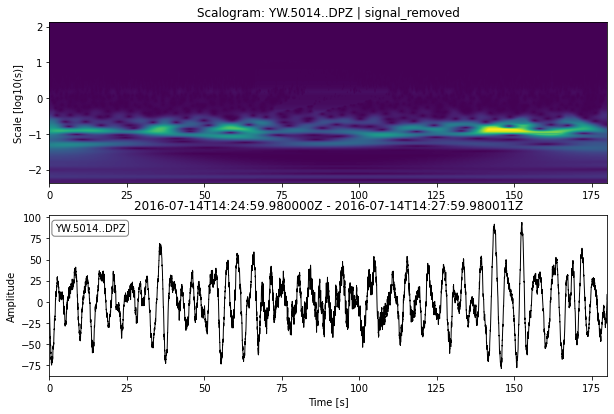

In [10]:
# Test update functions
block.params.nsigma_method = "donoho"
block.params.bandpass_blocking = False
block.params.estimate_noise = True
block.params.snr_detection = True
block.run()
print("Available tags:")
print(block.tags)
block.plot("signal_removed")

#### Test ASDF format

In [11]:
filename = "testdata/578449.h5"

params = bcs.Parameter(block_threshold=1.0, noise_threshold="hard", signal_threshold="hard")

# Initalize the block processing module
block = bcs.Block(choice=params, asdf_file=filename)

In [12]:
block.run()
print(block.get_station_list())
print(block.tags)

['LB.DAC.', 'LL.ELK.', 'LL.MNV.', 'UU.DUG.', 'UU.HVU.', 'UU.JLU.']
['input', 'band_rejected', 'noise_removed', 'signal_removed']


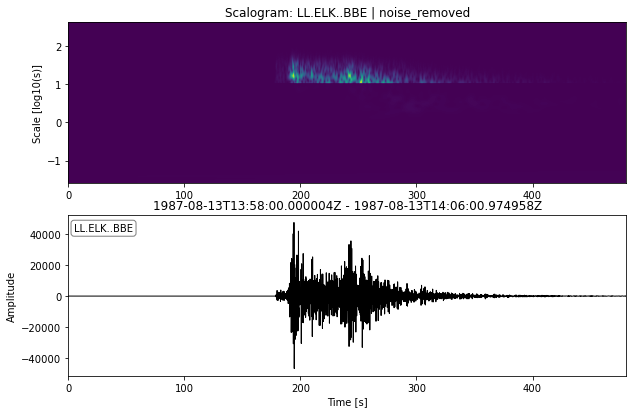

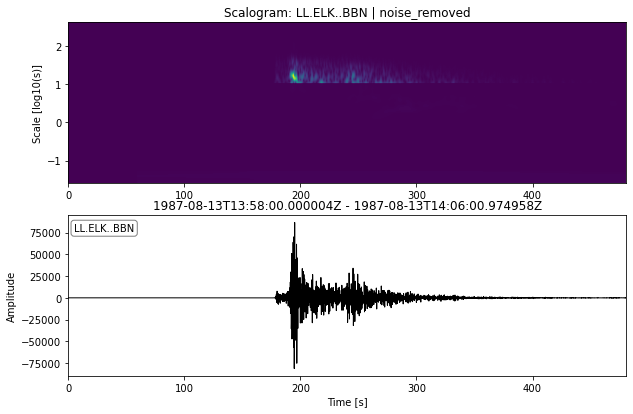

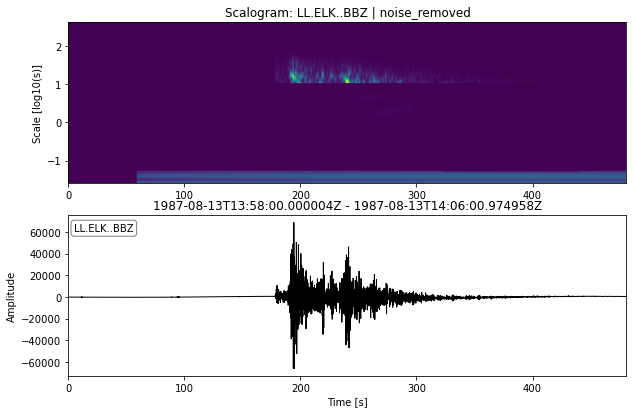

In [13]:
block.plot("noise_removed", station="ELK")